In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import os

## Get Benchmark Results

The datafiles can either be generate yourself by running the benchmark using [1_run_benchmark.ipynb](1_run_benchmark.ipynb), or by downloading results from an existing benchmark:

```
wget -nc 'https://cleanlab-public.s3.amazonaws.com/ActiveLearning/Benchmark/SingleVsMultiannotator/results.tar.gz'
tar -xf results.tar.gz results/
```

In [2]:
noise_color = [
    (0.6, 'tab:blue'), 
    (0.7, 'tab:orange'), 
    (0.8, 'tab:green'), 
    (0.9, 'tab:red'), 
    (1.0, 'tab:purple')]

In [3]:
def compute_std_dev(accuracy):
    def compute_std_dev_ind(accs):
        mean = np.mean(accs)
        std_dev = np.std(accs)
        return np.array([mean - std_dev, mean + std_dev])

    std_dev = np.apply_along_axis(compute_std_dev_ind, 0, accuracy)
    return std_dev

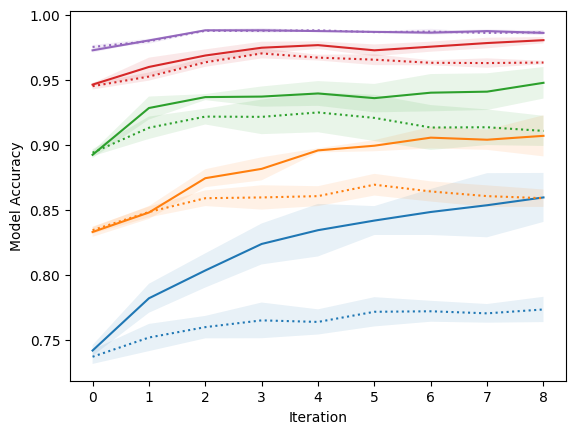

In [4]:
for noise_rate, color in noise_color:
    model_accuracy = np.array([np.load(f"results/{noise_rate}/{f}") for f in os.listdir(f"results/{noise_rate}/") if ".npy" in f and f.startswith(f"multiannotator")])[:, :9]
    model_accuracy_std = compute_std_dev(model_accuracy)

    plt.plot(range(model_accuracy.shape[1]), np.mean(model_accuracy, axis=0), label=noise_rate, color=color)
    plt.fill_between(range(model_accuracy.shape[1]), model_accuracy_std[0], model_accuracy_std[1], alpha=0.1, facecolor=color)

for noise_rate, color in noise_color:
    single_model_accuracy = np.array([np.load(f"results/{noise_rate}/{f}") for f in os.listdir(f"results/{noise_rate}/") if ".npy" in f and f.startswith(f"single")])[:, :9]
    single_model_accuracy_std = compute_std_dev(single_model_accuracy)

    plt.plot(range(single_model_accuracy.shape[1]), np.mean(single_model_accuracy, axis=0), linestyle = 'dotted', color=color)
    plt.fill_between(range(single_model_accuracy.shape[1]), single_model_accuracy_std[0], single_model_accuracy_std[1], alpha=0.1, facecolor=color)
    
# plt.legend()
# plt.title("Single vs Multiannotator Label Model Accuracy")
plt.xlabel("Iteration")
plt.ylabel("Model Accuracy")
plt.xticks(range(model_accuracy.shape[1]))

plt.savefig('benchmark_graphs/single_vs_multi.png', bbox_inches = "tight")  
plt.savefig('benchmark_graphs/single_vs_multi.pdf', bbox_inches = "tight")

plt.show()

In [5]:
%%capture

colors = ["tab:cyan", "tab:pink"]

fig = plt.figure("Plot")
legend_fig = plt.figure("Legend plot")
ax = fig.add_subplot()

solid = mlines.Line2D([], [], color='black', label='Multiannotator labels')
dashed = mlines.Line2D([], [], color='black', linestyle="--", label='Single labels')
a = mpatches.Patch(color='tab:blue', label='Noise rate = 0.4')
b = mpatches.Patch(color='tab:orange', label='Noise rate = 0.3')
c = mpatches.Patch(color='tab:green', label='Noise rate = 0.2')
d = mpatches.Patch(color='tab:red', label='Noise rate = 0.1')
e = mpatches.Patch(color='tab:purple', label='Noise rate = 0')

legend_fig.legend(handles=[solid, dashed, a, b, c, d, e], loc="center")

legend_fig.set_size_inches(2.5, 4.5)
legend_fig.savefig("benchmark_graphs/single_vs_multi_legend.pdf")
legend_fig.savefig("benchmark_graphs/single_vs_multi_legend.png")
